# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-09-29 11:54:12.536376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 11:54:12.629690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 11:54:12.651875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 11:54:12.659934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 11:54:12.694203: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "amazon", sample_size=100_000
)

Loading train tensors:   0%|          | 0/7 [00:00<?, ?it/s]

Loading train tensors: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Sample size:  5000


Loading test tensors: 100%|██████████| 9/9 [00:25<00:00,  2.85s/it]


Test size:  5000
Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])
Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


## Classical

In [ ]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "rot": "X",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

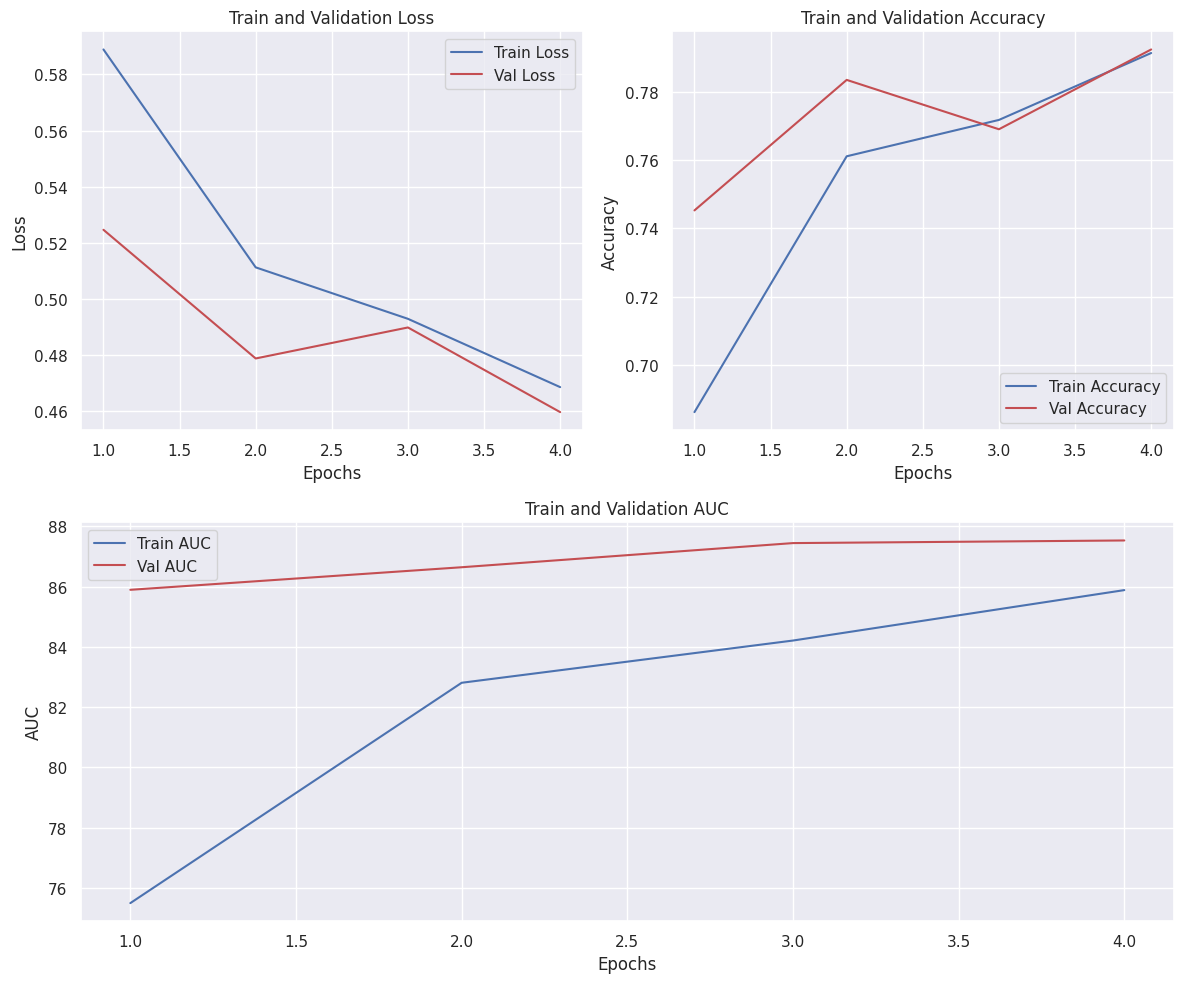

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)